# **Imports**

In [68]:
import numpy as np
import pandas as pd
import statistics
import math
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import json
import escher
from escher import Builder
import cobra
from time import sleep

# **File Reading**

In [69]:
simData = np.load(r"../../out/geneRxnVerifData/output.npy", allow_pickle=True, encoding='ASCII')
fluxesWithCaption = simData.tolist()['agents']['0']['listeners']['fba_results']['estimated_fluxes']
complexes = simData.tolist()['agents']['0']['bulk']

ecData = pd.read_csv(r"../new genes/geneData.txt")
ecReactions = ecData["reactionID"].values.tolist()
temp = []
for word in ecReactions:
    if not word == "No Reaction Found":
        temp.append(word)
ecReactions = temp

metabolData = np.load(r"../../out/geneRxnVerifData/stoichiometry.npy", allow_pickle=True, encoding='ASCII')
rxn_metabolites = metabolData.tolist()

In [96]:
simData.tolist()['agents']['0']['listeners']['fba_results']['estimated_exchange_dmdt']

{'ACET[p]': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'AMMONIUM[c]': [-822513,
  -808566,
  -832699,
  -809257,
  -827246,
  -816955,
  -853149,
  -804807,
  -823966,
  -865165,
  -907571,
  -905794,
  -868902,
  -907860,
  -871571,
  -895288,
  -930871,
  -937839,
  -905740,
  -938703,
  -924057,
  -889079,
  -910948,
  -942363,
  -931365,
  -922104,
  -892532,
  -942537,
  -941964,
  -970313],
 'BETAINE[p]': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'BUTANAL[c]': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'CA+2[p]': [-22,
  0,
  -163,
  -162,
  -294,
  -286,
  -396,
  -388,
  -460,
  -459,
  -521,
  -531,
  -588,
  -596,
  -632,
  -646,
  -669,
  -683,
  -707,
  -

# **Collect Reactions Per Metabolite**

In [97]:
rxns = list(rxn_metabolites.keys())
glucoseRxns = {}
fructoseRxns = {}
for rxn in rxns:
    metabolites = rxn_metabolites[rxn].keys()
    for metabolite in metabolites:
        if metabolite == 'GLC[p]':
            glucoseRxns[rxn] = rxn_metabolites[rxn]
        if metabolite == 'FRU[p]':
            fructoseRxns[rxn] = rxn_metabolites[rxn]

In [98]:
fructoseRxns

{'TRANS-RXN0-582-FRU/PTSI-PHOSPHORYLATED//CPD-16154/PTSI-MONOMER.48.': {'FRU[p]': -1,
  'PTSI-PHOSPHORYLATED[c]': -1,
  'CPD-16154[c]': 1,
  'PTSI-MONOMER[c]': 1},
 'TRANS-RXN0-582-FRU/PTSI-PHOSPHORYLATED//FRU1P/PTSI-MONOMER.44.': {'FRU[p]': -1,
  'PTSI-PHOSPHORYLATED[c]': -1,
  'FRU1P[c]': 1,
  'PTSI-MONOMER[c]': 1}}

In [99]:
glucoseRxns

{'3.2.1.21-RXN-Beta-D-glucosides/WATER//Non-Glucosylated-Glucose-Acceptors/GLC.64.': {'Beta-D-glucosides[p]': -1,
  'WATER[p]': -1,
  'Non-Glucosylated-Glucose-Acceptors[p]': 1,
  'GLC[p]': 1},
 'GLUCOSE-1-PHOSPHAT-RXN[CCO-PERI-BAC]-GLC-1-P/WATER//GLC/Pi.36.': {'GLC-1-P[p]': -1,
  'WATER[p]': -1,
  'GLC[p]': 1,
  'Pi[p]': 1},
 'RXN0-6373-GLC/UBIQUINONE-8//GLC-D-LACTONE/CPD-9956.41.': {'GLC[p]': -1,
  'UBIQUINONE-8[i]': -1,
  'GLC-D-LACTONE[p]': 1,
  'CPD-9956[i]': 1},
 'RXN0-6418': {'GLC[p]': -1, 'D-Glucose[p]': 1},
 'RXN0-6418 (reverse)': {'GLC[p]': 1, 'D-Glucose[p]': -1},
 'RXN0-6418-GLC//CPD-15374.15.': {'GLC[p]': -1, 'CPD-15374[p]': 1},
 'RXN0-6418-GLC//CPD-15374.15. (reverse)': {'GLC[p]': 1, 'CPD-15374[p]': -1},
 'RXN0-7077-GLC/PROTON//ALPHA-GLUCOSE/PROTON.33.': {'GLC[p]': -1,
  'PROTON[p]': -1,
  'ALPHA-GLUCOSE[c]': 1,
  'PROTON[c]': 1},
 'RXN0-7077-GLC/PROTON//GLC/PROTON.23.': {'GLC[p]': -1,
  'PROTON[p]': -1,
  'GLC[c]': 1,
  'PROTON[c]': 1},
 'RXN0-7077-GLC/PROTON//Glucopyrano

In [100]:
fluxesWithCaption['TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# **Find Fluxes for Reactions in Lists**

In [101]:
%run Viz_Functions.ipynb

ValueError: zero-size array to reduction operation fmin which has no identity

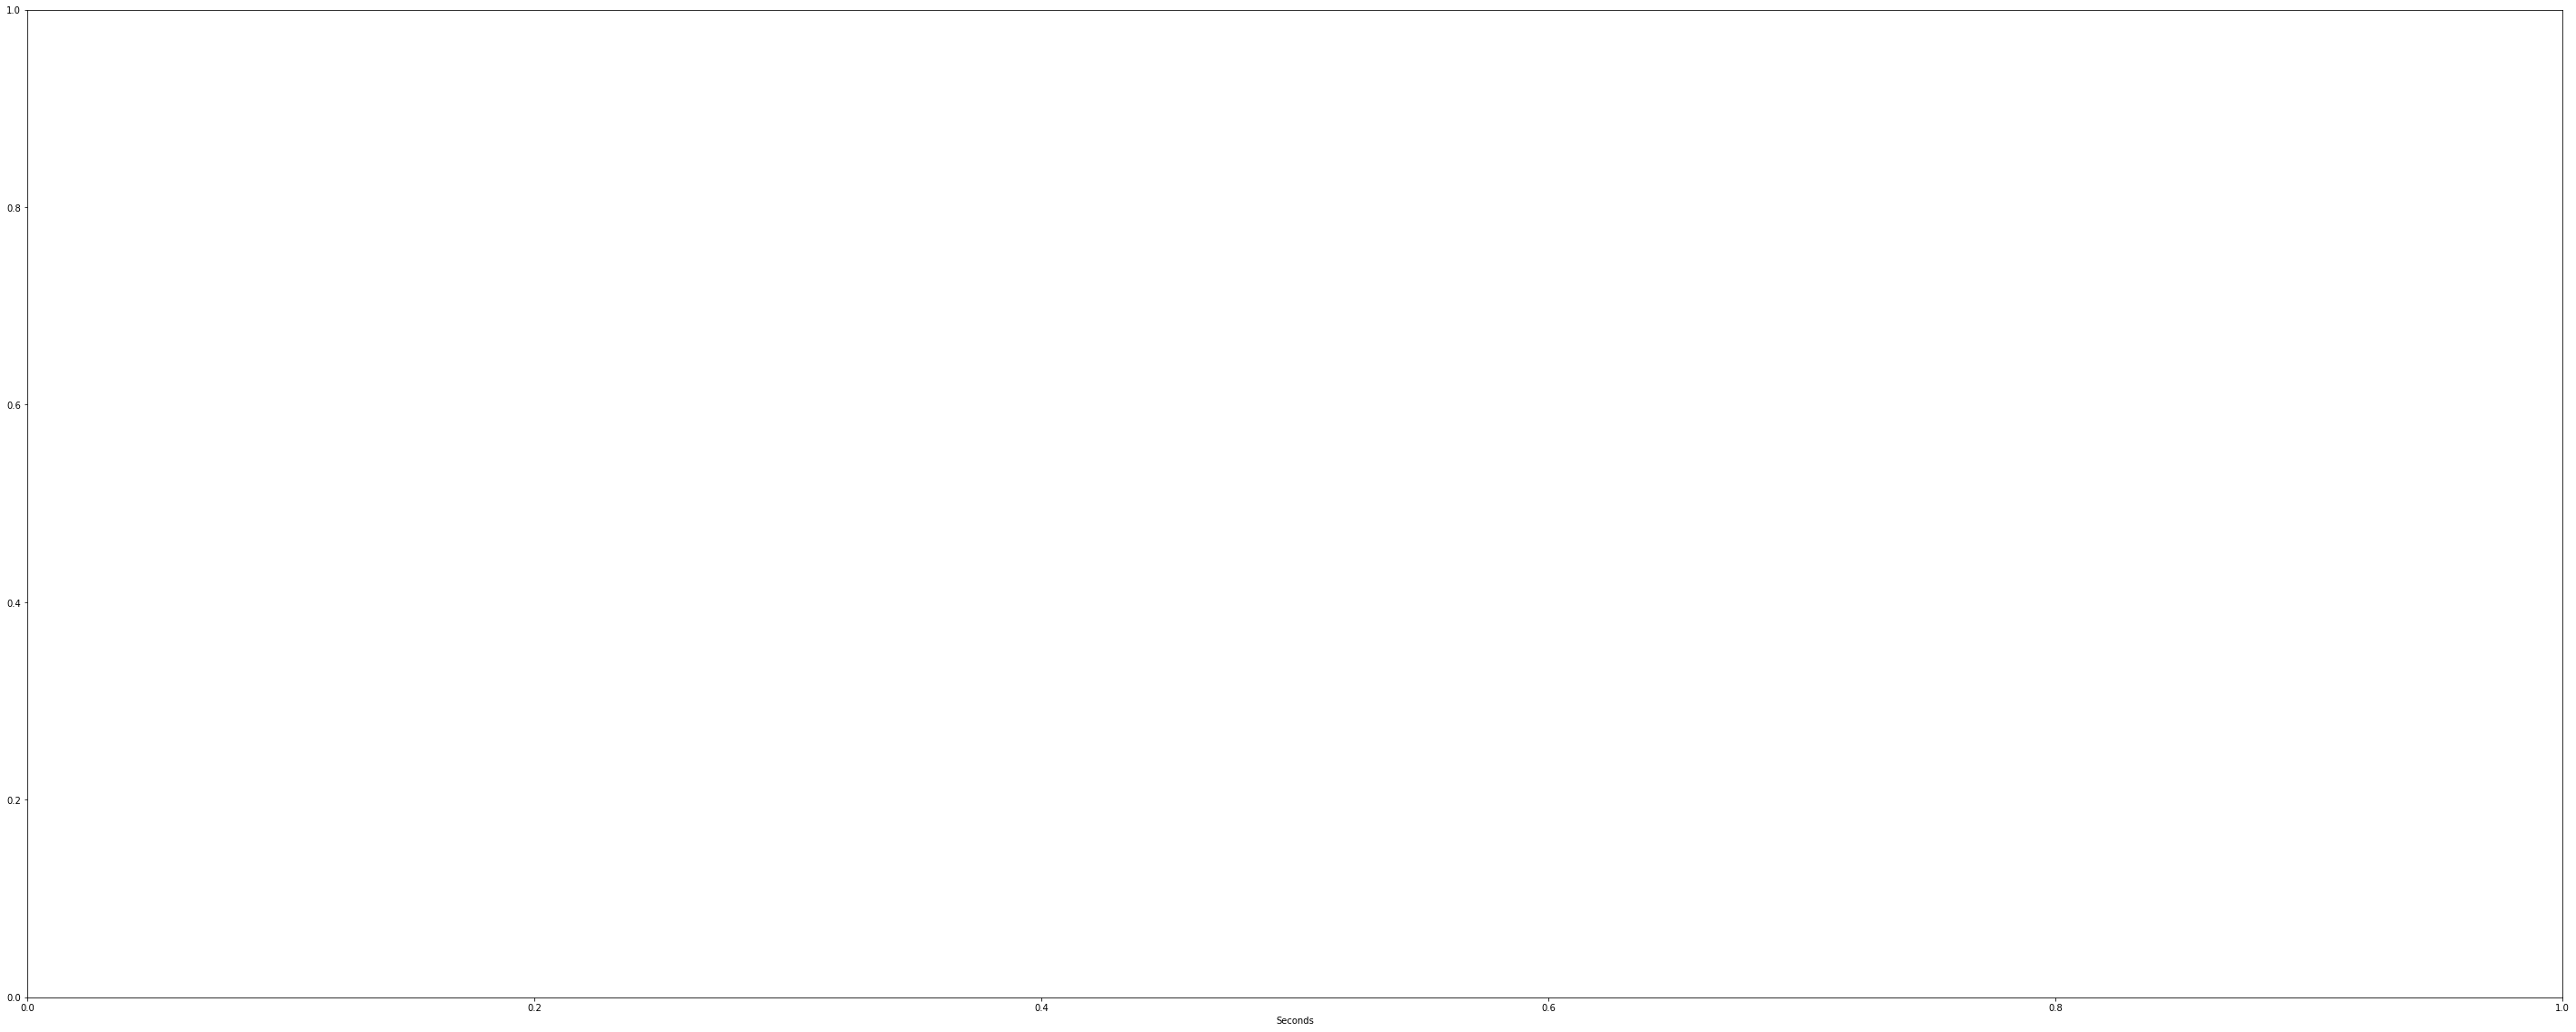

In [102]:
fluxes = {}
for rKeys in fructoseRxns.keys():
    fluxes[rKeys] = fluxesWithCaption[rKeys]
createHeatMapFluxes(fluxes, 20, True)

In [ ]:
fluxes2 = {}
for rKeys2 in glucoseRxns.keys():
    fluxes2[rKeys2] = fluxesWithCaption[rKeys2]
createHeatMapFluxes(fluxes2, 25, True)

# **Establish Glycolysis**

In [103]:
glycolysis = ['TRANS-RXN-157-PTSH-PHOSPHORYLATED', 'TRANS-RXN0-574-GLC', 'TRANS-RXN-158A','TRANS-RXN0-582-FRU/PTSI-PHOSPHORYLATED','PGLUCISOM-RXN', '6PFRUCTPHOS-RXN', 'F16BDEPHOS-RXN', 'F16ALDOLASE-RXN', 'TRIOSEPISOMERIZATION-RXN', 'GAPOXNPHOSPHN-RXN', 'PHOSGLYPHOS-RXN', 'RXN-15513', '3PGAREARR-RXN', '2PGADEHYDRAT-RXN', 'PEPDEPHOS-RXN', 'PEPSYNTH-RXN']

In [104]:
glycolysisFluxes = {}
foundNames = []
for rxn in glycolysis:
    for key in fluxesWithCaption:
        if rxn in key:
            foundNames.append((rxn, key))

In [105]:
foundNames

[('TRANS-RXN-157-PTSH-PHOSPHORYLATED',
  'TRANS-RXN-157-PTSH-PHOSPHORYLATED/ALPHA-GLUCOSE//ALPHA-GLC-6-P/PTSH-MONOMER.62.'),
 ('TRANS-RXN-157-PTSH-PHOSPHORYLATED',
  'TRANS-RXN-157-PTSH-PHOSPHORYLATED/ALPHA-GLUCOSE//D-glucopyranose-6-phosphate/PTSH-MONOMER.76.'),
 ('TRANS-RXN-157-PTSH-PHOSPHORYLATED',
  'TRANS-RXN-157-PTSH-PHOSPHORYLATED/ALPHA-GLUCOSE//GLC-6-P/PTSH-MONOMER.56.'),
 ('TRANS-RXN-157-PTSH-PHOSPHORYLATED',
  'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//ALPHA-GLC-6-P/PTSH-MONOMER.52.'),
 ('TRANS-RXN-157-PTSH-PHOSPHORYLATED',
  'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//D-glucopyranose-6-phosphate/PTSH-MONOMER.66.'),
 ('TRANS-RXN-157-PTSH-PHOSPHORYLATED',
  'TRANS-RXN-157-PTSH-PHOSPHORYLATED/GLC//GLC-6-P/PTSH-MONOMER.46.'),
 ('TRANS-RXN-157-PTSH-PHOSPHORYLATED',
  'TRANS-RXN-157-PTSH-PHOSPHORYLATED/Glucopyranose//ALPHA-GLC-6-P/PTSH-MONOMER.62.'),
 ('TRANS-RXN-157-PTSH-PHOSPHORYLATED',
  'TRANS-RXN-157-PTSH-PHOSPHORYLATED/Glucopyranose//D-glucopyranose-6-phosphate/PTSH-MONOMER.76.'),


In [106]:
prev = ""
for names in foundNames:
    if prev == names[0]:
        for i in range(len(glycolysisFluxes[prev])):
            if "(reverse)" in names[1]:
                glycolysisFluxes[prev][i] -= fluxesWithCaption[names[1]][i]
            else:
                glycolysisFluxes[prev][i] += fluxesWithCaption[names[1]][i]
    else:
        prev = names[0]
        glycolysisFluxes[prev] = fluxesWithCaption[names[1]]

In [107]:
glycolysisFluxes

{'TRANS-RXN-157-PTSH-PHOSPHORYLATED': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'TRANS-RXN0-574-GLC': [218023,
  217557,
  243101,
  239694,
  262093,
  260929,
  280170,
  275701,
  290498,
  295538,
  315111,
  317761,
  316239,
  325897,
  326292,
  329555,
  342439,
  346647,
  345950,
  349734,
  352481,
  346506,
  349584,
  358615,
  361457,
  358431,
  353542,
  363447,
  365663,
  370780],
 'TRANS-RXN-158A': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'TRANS-RXN0-582-FRU/PTSI-PHOSPHORYLATED': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'PGLUCISOM-RXN': [187178,
  232516,
  238866,
  246168,
  268500,
  280012,
  282598,
  315502,
  330732,
  313650,
  332282,


In [108]:
fluxLast = {}

for key in glycolysisFluxes.keys():
    fluxes = glycolysisFluxes[key]
    fluxLast[key] = fluxes[-1]

In [109]:
fluxLast

{'TRANS-RXN-157-PTSH-PHOSPHORYLATED': 0,
 'TRANS-RXN0-574-GLC': 370780,
 'TRANS-RXN-158A': 0,
 'TRANS-RXN0-582-FRU/PTSI-PHOSPHORYLATED': 0,
 'PGLUCISOM-RXN': 394794,
 '6PFRUCTPHOS-RXN': 90275,
 'F16BDEPHOS-RXN': 9774,
 'F16ALDOLASE-RXN': 151536,
 'TRIOSEPISOMERIZATION-RXN': -491326,
 'GAPOXNPHOSPHN-RXN': 517128,
 'PHOSGLYPHOS-RXN': -1034252,
 'RXN-15513': 0,
 '3PGAREARR-RXN': -1032718,
 '2PGADEHYDRAT-RXN': 516467,
 'PEPDEPHOS-RXN': 89876,
 'PEPSYNTH-RXN': 0}

In [110]:
escher.list_available_maps()

[{'organism': 'Saccharomyces cerevisiae',
  'map_name': 'iMM904.Central carbon metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Inositol retinol metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Glycolysis TCA PPP'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Tryptophan metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Carbohydrate metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Amino acid metabolism (partial)'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Nucleotide metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid biosynthesis (saturated)'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Nucleotide and histidine biosynthesis'},
 {'organism': 'Escherichia coli', 'map_name': 'e_coli_core.Core metabolism'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Central metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid beta-oxidation'}

In [111]:
escher.list_available_models()

[{'organism': 'Saccharomyces cerevisiae', 'model_name': 'iMM904'},
 {'organism': 'Homo sapiens', 'model_name': 'RECON1'},
 {'organism': 'Escherichia coli', 'model_name': 'e_coli_core'},
 {'organism': 'Escherichia coli', 'model_name': 'iJO1366'}]

In [112]:
with open('../../iJO1366.Central metabolism.json') as json_file:
    data = json.load(json_file)

In [113]:
escherRxns = data[1]['reactions']
names = []

for number in escherRxns:
    reactionName = escherRxns[number]['name']
    names.append(reactionName)

In [114]:
enzymeNames = ['glucose-6-phosphate isomerase', '6-phosphofructokinase', 'fructose-bisphosphatase', 'fructose-bisphosphate aldolase', 'triose-phosphate isomerase', 'glyceraldehyde-3-phosphate dehydrogenase (phosphorylating)', 'phosphoglycerate kinase', 'pyruvate kinase', 'phosphoglycerate mutase (2,3-diphosphoglycerate-dependent)', 'pyruvate-water dikinase (phosphorylating)', 'phosphopyruvate hydratase']

In [115]:
glycolysis 

['TRANS-RXN-157-PTSH-PHOSPHORYLATED',
 'TRANS-RXN0-574-GLC',
 'TRANS-RXN-158A',
 'TRANS-RXN0-582-FRU/PTSI-PHOSPHORYLATED',
 'PGLUCISOM-RXN',
 '6PFRUCTPHOS-RXN',
 'F16BDEPHOS-RXN',
 'F16ALDOLASE-RXN',
 'TRIOSEPISOMERIZATION-RXN',
 'GAPOXNPHOSPHN-RXN',
 'PHOSGLYPHOS-RXN',
 'RXN-15513',
 '3PGAREARR-RXN',
 '2PGADEHYDRAT-RXN',
 'PEPDEPHOS-RXN',
 'PEPSYNTH-RXN']

In [116]:
want = []
for rxn in enzymeNames:
    for name in names:
        if name.lower() in rxn.lower() or rxn.lower() in name.lower():
            want.append((rxn, name))

In [117]:
nameAssociation = {
    'TRANS-RXN-157-PTSH-PHOSPHORYLATED': 'D-glucose transport via PEP:Pyr PTS',
    'TRANS-RXN0-574-GLC': 'D-glucose transport via PEP:Pyr PTS',
    'TRANS-RXN-158A': 'FRUpts2',
    'TRANS-RXN0-582-FRU/PTSI-PHOSPHORYLATED': 'FRUpts2',
    'PGLUCISOM-RXN': 'Glucose-6-phosphate isomerase',
    '6PFRUCTPHOS-RXN': 'Phosphofructokinase',
    'F16BDEPHOS-RXN': 'Fructose-bisphosphatase',
    'F16ALDOLASE-RXN': 'Fructose-bisphosphate aldolase',
    'TRIOSEPISOMERIZATION-RXN': 'Triose-phosphate isomerase',
    'GAPOXNPHOSPHN-RXN': 'Glyceraldehyde-3-phosphate dehydrogenase',
    'PHOSGLYPHOS-RXN': 'Phosphoglycerate kinase',
    'RXN-15513': 'Phosphoglycerate mutase',
    '3PGAREARR-RXN': 'Phosphoglycerate mutase',
    '2PGADEHYDRAT-RXN': 'Enolase',
    'PEPDEPHOS-RXN': 'Pyruvate kinase',
    'PEPSYNTH-RXN': 'Phosphoenolpyruvate synthase'
}

In [118]:
escherKeys = []
currentKeys = glycolysisFluxes.keys()

for key in currentKeys:
    new = nameAssociation[key]
    escherKeys.append(new)

In [119]:
escherKeys

['D-glucose transport via PEP:Pyr PTS',
 'D-glucose transport via PEP:Pyr PTS',
 'FRUpts2',
 'FRUpts2',
 'Glucose-6-phosphate isomerase',
 'Phosphofructokinase',
 'Fructose-bisphosphatase',
 'Fructose-bisphosphate aldolase',
 'Triose-phosphate isomerase',
 'Glyceraldehyde-3-phosphate dehydrogenase',
 'Phosphoglycerate kinase',
 'Phosphoglycerate mutase',
 'Phosphoglycerate mutase',
 'Enolase',
 'Pyruvate kinase',
 'Phosphoenolpyruvate synthase']

In [120]:
fluxLast

{'TRANS-RXN-157-PTSH-PHOSPHORYLATED': 0,
 'TRANS-RXN0-574-GLC': 370780,
 'TRANS-RXN-158A': 0,
 'TRANS-RXN0-582-FRU/PTSI-PHOSPHORYLATED': 0,
 'PGLUCISOM-RXN': 394794,
 '6PFRUCTPHOS-RXN': 90275,
 'F16BDEPHOS-RXN': 9774,
 'F16ALDOLASE-RXN': 151536,
 'TRIOSEPISOMERIZATION-RXN': -491326,
 'GAPOXNPHOSPHN-RXN': 517128,
 'PHOSGLYPHOS-RXN': -1034252,
 'RXN-15513': 0,
 '3PGAREARR-RXN': -1032718,
 '2PGADEHYDRAT-RXN': 516467,
 'PEPDEPHOS-RXN': 89876,
 'PEPSYNTH-RXN': 0}

In [121]:
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
    reaction_data={r: v for r, v in zip(escherKeys, fluxLast.values())},
)

In [122]:
builder

Builder(reaction_data={'D-glucose transport via PEP:Pyr PTS': 370780, 'FRUpts2': 0, 'Glucose-6-phosphate isome…

In [123]:
{'2-PG[c]': -1, 'G3P[c]': 1}

{'2-PG[c]': -1, 'G3P[c]': 1}